## TensorFlow Logistic Regression
<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/18-1.png" style="max-width: 80%; height: auto;">

<img src = "http://cmseng.skku.edu/CMSLecture/ML/img/18-2.png" style="max-width: 80%; height: auto;">

In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

print(tf.__version__)

# 실행할 때마다 같은 결과를 출력하기 위해 설정하는 부분입니다.
np.random.seed(1234)
tf.random.set_seed(1234)

2.0.0


## Google Colab 사용 시. 
### Google Drive 에 저장되어 있는 diabetes,csv 파일을 읽어들이기 위해서
### Colab 의 /content/gdrive/ 에 Google Drive 마운트 시킴

In [ ]:
from google.colab import drive   # colab 사용시 mount 하기 위한 용도. local 에서는 불필요

drive.mount('/content/gdrive/')  # colab 사용시 mount 하기 위한 용도. local 에서는 불필요

### 마운트된 Google Drive 의 working directory 이동

In [ ]:
import os

working_dir = 'dataset'

# Google Drive 에서 Colab Default Directory
colab_default_dir = '/content/gdrive/My Drive/Colab Notebooks/'

original_dir = os.getcwd()  # save current dir

try:

    os.chdir(colab_default_dir)

    if not os.path.exists(working_dir):
        os.mkdir(working_dir)

    os.chdir(working_dir)  # change working dir
    print('current dir = ', os.getcwd())

except Exception as err:
    
    os.chdir(original_dir)
    print(str(err))

In [2]:
# loadtxt() 이용해서 diabetes.csv 읽어들임

import numpy as np

try:

    loaded_data = np.loadtxt('./diabetes.csv', delimiter=',')

    # training data / test data 분리

    seperation_rate = 0.3  # 분리 비율
    test_data_num = int(len(loaded_data) * seperation_rate)

    np.random.shuffle(loaded_data)

    test_data = loaded_data[ 0:test_data_num ]
    training_data = loaded_data[ test_data_num: ]

    # training_x_data / training_t__data 생성

    training_x_data = training_data[ :, 0:-1]
    training_t_data = training_data[ :, [-1]]

    # test_x_data / test_t__data 생성
    test_x_data = test_data[ :, 0:-1]
    test_t_data = test_data[ :, [-1]]

    print("loaded_data.shape = ", loaded_data.shape)
    print("training_x_data.shape = ", training_x_data.shape)
    print("training_t_data.shape = ", training_t_data.shape)

    print("test_x_data.shape = ", test_x_data.shape)
    print("test_t_data.shape = ", test_t_data.shape)

except Exception as err:

    print(str(err))

loaded_data.shape =  (759, 9)
training_x_data.shape =  (532, 8)
training_t_data.shape =  (532, 1)
test_x_data.shape =  (227, 8)
test_t_data.shape =  (227, 1)


In [4]:
# Logistic Regression 을 keras 이용하여 생성

model = Sequential()

# 노드 1개인 출력층 생성
model.add(Dense(training_t_data.shape[1],
                input_shape=(training_x_data.shape[1],),
                activation='sigmoid'))  

# 노드 2개인 출력층 생성
# model.add(Dense(30, 
#                 input_shape=(training_x_data.shape[1],),
#                 activation='sigmoid'))  
# model.add(Dense(training_t_data.shape[1], 
#                 activation='sigmoid'))

In [5]:
# 학습을 위한 optimizer, 손실함수 loss 정의

model.compile(optimizer=Adam(learning_rate=0.01), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [6]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(training_x_data, training_t_data, epochs=1000, validation_split=0.2, verbose=0)

end_time = datetime.now()

print('\nElapsed Time => ', end_time - start_time)


Elapsed Time =>  0:00:28.230216


In [7]:
# hist 타입 및 key 확인

print(type(hist))
print(hist.history.keys())     

<class 'tensorflow.python.keras.callbacks.History'>
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
# 모델 입력, 출력, 가중치 확인

print(model.input)
print(model.output)
print(model.weights)

In [8]:
model.evaluate(test_x_data, test_t_data, verbose=2)

227/1 - 0s - loss: 0.4862 - accuracy: 0.7357


[0.5029315596635121, 0.73568285]

In [9]:
import pandas as pd

history_DF=pd.DataFrame(hist.history)
history_DF

,loss,accuracy,val_loss,val_accuracy
0,0.623471,0.680000,0.595649,0.719626
1,0.574507,0.729412,0.556809,0.747664
2,0.554958,0.701176,0.542477,0.747664
3,0.545549,0.708235,0.534615,0.775701
4,0.537958,0.712941,0.526247,0.775701
...,...,...,...,...
995,0.467023,0.774118,0.463928,0.766355
996,0.466932,0.776471,0.465470,0.766355
997,0.467278,0.771765,0.466127,0.766355
998,0.467590,0.776471,0.464882,0.766355


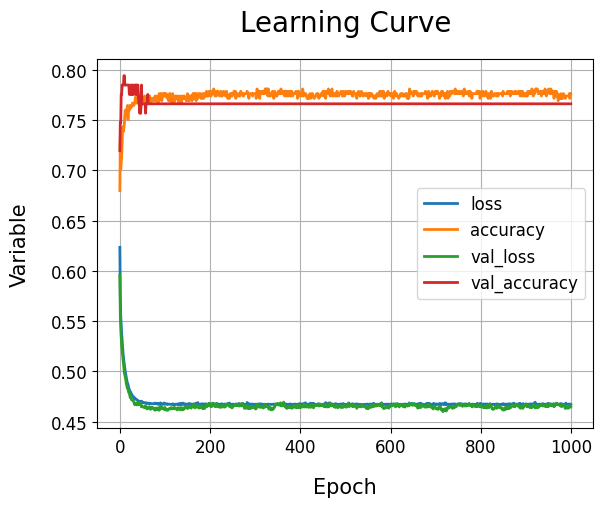

In [10]:
import matplotlib.pyplot as plt

# history_DF.plot(figsize=(10,7), linewidth=3)
history_DF.plot(linewidth=2)

plt.grid(True)
plt.legend(loc="center right", fontsize=12)
plt.title("Learning Curve", fontsize=20, pad=20)
plt.xlabel('Epoch', fontsize=15, loc='center',labelpad=15)
plt.ylabel('Variable', fontsize=15, rotation=90, loc='center', labelpad=15)
plt.tick_params(axis='both', labelsize=12)
# plt.tick_params(axis='y', labelsize=15)

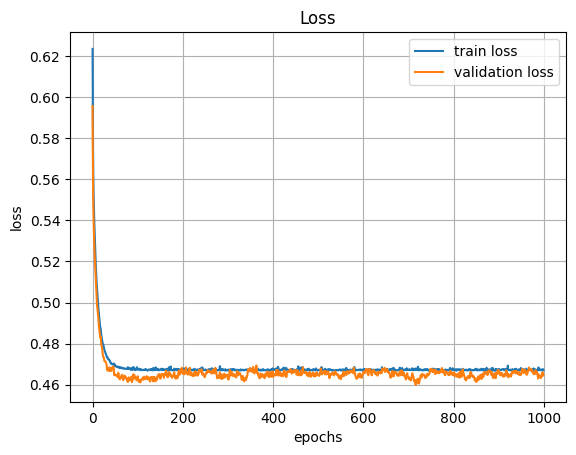

In [11]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

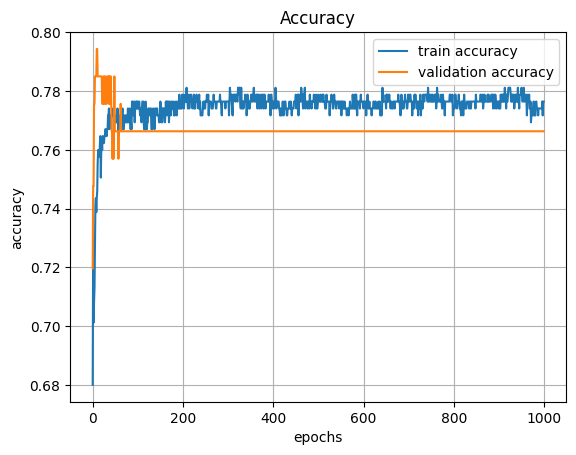

In [12]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()